***
# Cleaning cars data
***

In [136]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cwd = os.getcwd()
print(cwd)

c:\Users\segch001\Documents\GitHub\ml_car


In [4]:
# get the program file path
cwd = os.getcwd()

# Loop to create folders
folder_names = ['Dataframe', 'Output', 'Data']

folders = {}

for folder_name in folder_names:
    folders[folder_name] = os.path.join(cwd, folder_name)
    
    # print(folders)

    if not os.path.exists(os.path.join(cwd, folder_name)):
        os.makedirs(os.path.join(cwd, folder_name))
        print(f'Le dossier « {folder_name} » a été créé')

    else:
        print(f'Le dossier « {folder_name} » est existant')

Le dossier « Dataframe » est existant
Le dossier « Output » est existant
Le dossier « Data » est existant


In [5]:
# Création des variables de path
path_prog =     cwd + '\\'
path_data =     folders['Data'] + '\\'
path_df =       folders['Dataframe'] + '\\'
path_output =   folders['Output'] + '\\'

# Mettre \\ pour éviter les erreurs
path_dict = [path_prog, path_data, path_df, path_output]
for path in path_dict:
    path = path.replace('\\','\\\\')

# Détermination de l'année
print(path_prog)
print(path_data)
print(path_df)
print(path_output)

c:\Users\segch001\Documents\GitHub\ml_car\
c:\Users\segch001\Documents\GitHub\ml_car\Data\
c:\Users\segch001\Documents\GitHub\ml_car\Dataframe\
c:\Users\segch001\Documents\GitHub\ml_car\Output\


In [137]:
# Import et nettoyage
cars = pd.read_excel(path_data + 'BDSOQ.xlsx', header=5)
# Source des données : 
# https://bdso.gouv.qc.ca/pls/ken/ken213_afich_tabl.page_tabl?p_iden_tran=&p_lang=&p_m_o=SAAQ&p_id_ss_domn=718&p_id_raprt=3372#tri_age=1&tri_tertr=0

cars_ld = cars.loc[3:4].T.reset_index().loc[1:]
pd.set_option('display.max_columns', None)
column_names = ['year', 'vt', 'cl']
cars_ld.columns.values[0:len(column_names)] = column_names
cars_ld['total'] = cars_ld['vt'] + cars_ld['cl']
cars_ld 

,year,vt,cl,total
1,2000,2629106,816997,3446103
2,2001,2678598,843160,3521758
3,2002,2729651,870812,3600463
4,2003,2799402,917540,3716942
5,2004,2847525,955337,3802862
6,2005,2871969,990193,3862162
7,2006,2899086,1035485,3934571
8,2007,2932451,1088787,4021238
9,2008,2972370,1132018,4104388
10,2009,3000245,1201962,4202207


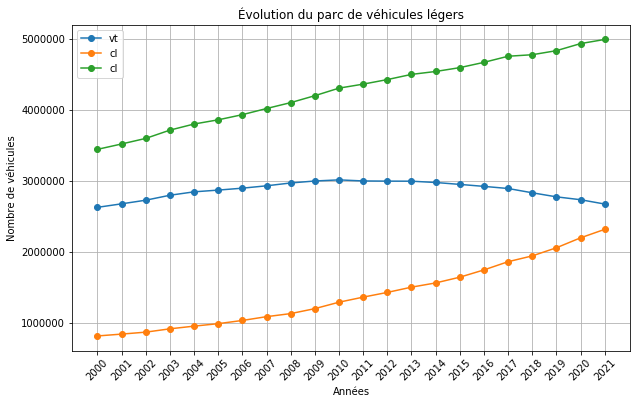

In [138]:
# Create the line plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
ax.plot(cars_ld['year'], cars_ld['vt'], marker='o', label='vt')
ax.plot(cars_ld['year'], cars_ld['cl'], marker='o', label='cl')
ax.plot(cars_ld['year'], cars_ld['total'], marker='o', label='cl')

# Add labels and title
ax.set_xlabel('Années')
ax.set_ylabel('Nombre de véhicules')
ax.set_title('Évolution du parc de véhicules légers')
ax.legend()

ax.set_xticklabels(cars_ld['year'], rotation=45, ha='center')
# Display the plot
ax.grid(True)
plt.show()

In [169]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt

# Load and clean the data
cars = pd.read_excel(path_data + 'BDSOQ.xlsx', header=5)
cars_ld = cars.loc[3:4].T.reset_index().loc[1:]
pd.set_option('display.max_columns', None)
column_names = ['year', 'vt', 'cl']
cars_ld.columns.values[0:len(column_names)] = column_names
cars_ld['total'] = cars_ld['vt'] + cars_ld['cl']

# Convert 'year' column to integers
cars_ld['year'] = cars_ld['year'].astype(int)

# Splitting the data into X (year) and y (total)
X = cars_ld['year'].values.reshape(-1, 1)
y = cars_ld['total'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Create a range of years for prediction
years_to_predict = np.arange(2022, 2031).reshape(-1, 1)

# Calculate the predictions
predictions = model.predict(years_to_predict)

# Compute confidence intervals for predictions
confidence = 0.95
std_error = np.sqrt(np.sum((y - model.predict(X)) ** 2) / (len(y) - 2))
t_multiplier = stats.t.ppf((1 + confidence) / 2, len(X) - 2)
margin_of_error = t_multiplier * std_error
confidence_intervals = np.column_stack((predictions - margin_of_error, predictions + margin_of_error))

# Create a DataFrame with original values, predictions, and confidence intervals
data = {'Year': np.concatenate((cars_ld['year'], years_to_predict.flatten())),
        'Original Total': np.concatenate((y, [None] * len(years_to_predict))),
        'Prediction': np.concatenate(([None] * len(cars_ld['year']), predictions)),
        'Lower CI': np.concatenate(([None] * len(cars_ld['year']), confidence_intervals[:, 0])),
        'Upper CI': np.concatenate(([None] * len(cars_ld['year']), confidence_intervals[:, 1]))}

predictions_df = pd.DataFrame(data)
# Replace None values with np.nan
predictions_df = predictions_df.replace([None], np.nan)

# Fit the statsmodels linear regression model
stats_model = sm.OLS(y, X).fit()

# Display regression summary
# print(stats_model.summary())

predictions_df

,Lower CI,Original Total,Prediction,Upper CI,Year
0,NaN,3446103.0,NaN,NaN,2000
1,NaN,3521758.0,NaN,NaN,2001
2,NaN,3600463.0,NaN,NaN,2002
3,NaN,3716942.0,NaN,NaN,2003
4,NaN,3802862.0,NaN,NaN,2004
5,NaN,3862162.0,NaN,NaN,2005
6,NaN,3934571.0,NaN,NaN,2006
7,NaN,4021238.0,NaN,NaN,2007
8,NaN,4104388.0,NaN,NaN,2008
9,NaN,4202207.0,NaN,NaN,2009


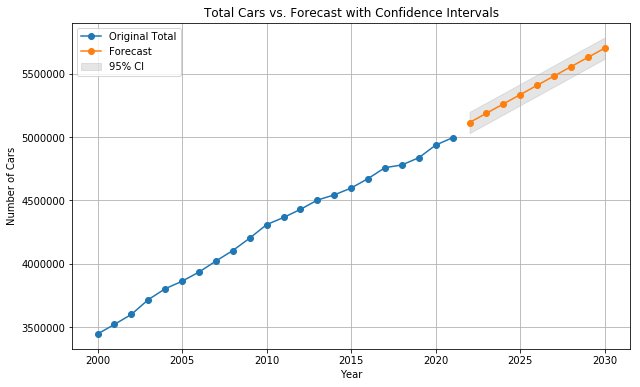

In [170]:
# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(predictions_df['Year'], predictions_df['Original Total'], label='Original Total', marker='o')
plt.plot(predictions_df['Year'], predictions_df['Prediction'], label='Forecast', marker='o')

# Add Confidence Intervals
plt.fill_between(predictions_df['Year'], predictions_df['Lower CI'], predictions_df['Upper CI'], color='gray', alpha=0.2, label='95% CI')

plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Total Cars vs. Forecast with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()